In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('train len', len(x_train))
print('test len', len(x_test))


x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

print('train shape', x_train.shape)
print('test sahpe', x_test.shape)


Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step
train len 25000
test len 25000
train shape (25000, 500)
test sahpe (25000, 500)


In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [4]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 68s 3ms/step - loss: 1.7548 - acc: 0.5031 - val_loss: 0.6925 - val_acc: 0.5228
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.6816 - acc: 0.5983 - val_loss: 0.6794 - val_acc: 0.5762
Epoch 3/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.6499 - acc: 0.7423 - val_loss: 0.6479 - val_acc: 0.6838
Epoch 4/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.5895 - acc: 0.8059 - val_loss: 0.5636 - val_acc: 0.7688
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.4678 - acc: 0.8385 - val_loss: 0.4436 - val_acc: 0.8092
Epoch 6/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.3689 - acc: 0.8627 - val_loss: 0.3996 - val_acc: 0.8406
Epoch 7/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.3232 - acc: 0.8720 - val_loss: 0.4126 - val_acc:

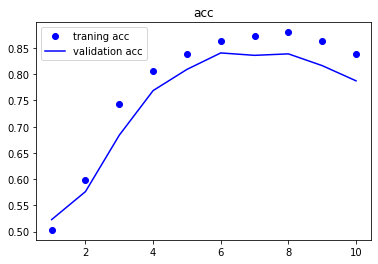

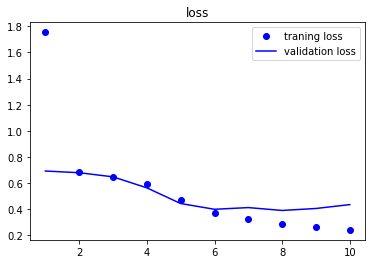

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print()
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()